## Experiment 3: Realworld data & Multiple kernels & projections

In [1]:
%load_ext autoreload
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import SGD
from tqdm.auto import tqdm
from gp import *
import pandas as pd
import numpy as np

### Sunspots data

In [2]:
# Load CSV (skip comment lines if they exist)
df = pd.read_csv("data/SN_m_tot_V2.0.csv", sep=";", comment="#", header=None)

# According to the spec:
# Col 0 = Year, Col 1 = Month, Col 2 = Decimal year, Col 3 = Monthly mean
years = df[0].to_numpy()
months = df[1].to_numpy()
decimal_date = df[2].to_numpy()
sunspot_mean = df[3].to_numpy()

# Use fractional year directly as "date"
date_array = decimal_date  

number of training points: 3319


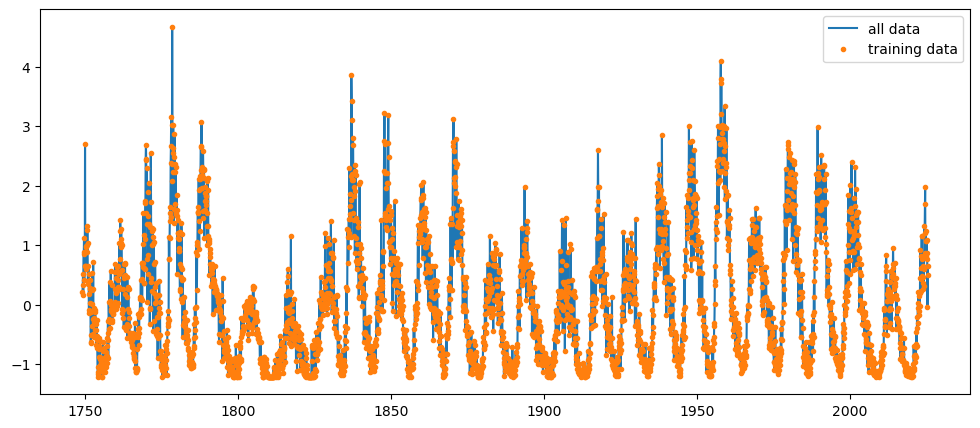

In [4]:
X_data = torch.from_numpy(date_array).unsqueeze(1)
y_data = torch.from_numpy(sunspot_mean).unsqueeze(1) 
# normalise
y_data = y_data - torch.mean(y_data)
y_std = torch.std(y_data)
if y_std > 0:     # guard against division by zero
    y_data = y_data / y_std

idx = torch.randperm(y_data.shape[0])[:]
# subset of the data
X_train = X_data[idx]
y_train = y_data[idx]

#X_train = X_data
#y_train = y_data

plt.figure(figsize=(12, 5))
plt.plot(X_data,y_data, label = 'all data')
plt.plot(X_train,y_train, '.', label = 'training data')
plt.legend()
print(f'number of training points: {y_train.shape[0]}')

In [5]:
## training preamble

kernels = ['SE', 'Laplace', 'RQ', 'LocPer']
methods = ['proj-sphere', 'proj-localised', 'proj-onehot', 'proj-mix'] #projections


M_elbo = 100
M_proj = 100

times_nll = []
out_nll = []





In [6]:
#training setting
methods = ['proj-sphere'] #projections

times_vfe = []
out_vfe = []
times_proj = []
out_proj = []

# for 1000 points
n_steps_1 = 2001
lr_1 = 0.5
tol = 1e-3
optimizer_1 = 'Adam'

# for 2000 points
n_steps_1 = 2001
lr_1 = 0.01
tol = 1e-3
optimizer_1 = 'Adam'

# for all 3300 points
n_steps_1 = 2001
lr_1 = 0.01
tol = 1e-3
optimizer_1 = 'Adam'

In [7]:
## training routine



print('starting training ....')
for k in kernels:
    print(f'kernel = {k}')
    
    ##### Vanilla GP (NLL) #####
    print('NLL training ...')
    
    gp_nll = GP(X_train, y_train, kernel = k)
    out = gp_nll.train_step(obj = 'nll', opt_name=optimizer_1, lr=lr_1, n_steps=n_steps_1, tol=tol, verbose = True)

    
    times_nll.append(out["time"])     # save elapsed time
    out_nll.append(out["nll"])
    
    
    ##### SparseGP (ELBO) ##### 
    
    gp_elbo = GP(X_train, y_train, kernel = k, M=M_elbo, method = 'VFE')
    out = gp_elbo.train_step(obj = 'elbo', opt_name=optimizer_1, lr=lr_1, n_steps=n_steps_1, tol=tol, verbose = True)

    times_vfe.append(out["time"])     # save elapsed time
    out_vfe.append(out["nll"])
    
    for m in methods:
        print(f'projection method = {m}')
    
        ##### ProjGP ##### 
        gp_proj = GP(X_train, y_train, kernel = k, M=M_proj, method = m)
        out = gp_proj.train_step(obj = 'proj', opt_name=optimizer_1, lr=lr_1, n_steps=n_steps_1, tol=tol, verbose = True)        

        times_proj.append(out["time"])     # save elapsed time
        out_proj.append(out["nll"])
        
print('Training complete')        

starting training ....
kernel = SE
NLL training ...
Optimising nll using Adam
Epoch 0: loss = 3093.8891
Epoch 200: loss = 1616.5576
Early stop at iteration 380: loss did not improve for 5 steps.
Elapsed time: 552.3[s] with NLL = 1549.13
[init_Z_kmeanspp] KMeans finished in 0.235 seconds
Optimising elbo using Adam
Epoch 0: loss = 4126.9134
Epoch 200: loss = 1917.6230
Epoch 400: loss = 1892.7968
Epoch 600: loss = 1885.4471
Early stop at iteration 726: loss did not improve for 5 steps.
Elapsed time: 16.5[s] with NLL = 1690.57
projection method = proj-sphere
Optimising proj using Adam
Epoch 0: loss = 132.7454
Epoch 200: loss = 113.4836
Epoch 400: loss = 112.2782
Early stop at iteration 483: loss did not improve for 5 steps.
Elapsed time: 102.8[s] with NLL = 1556.49
kernel = Laplace
NLL training ...
Optimising nll using Adam
Epoch 0: loss = 3393.9285
Epoch 200: loss = 1640.1077
Epoch 400: loss = 1438.4417
Epoch 600: loss = 1432.8665
Early stop at iteration 667: loss did not improve for 5 st

Epoch 200: loss = 3447.7238


Epoch 400: loss = 3430.0938


Epoch 600: loss = 3424.3996


Epoch 800: loss = 3424.3284


Epoch 1000: loss = 3424.3135


Epoch 1200: loss = 3424.3100


Epoch 1400: loss = 3424.1817


Epoch 1600: loss = 3423.9751


Epoch 1800: loss = 3423.9679


Epoch 2000: loss = 3423.9726
Elapsed time: 47.5[s] with NLL = 1934.14
projection method = proj-sphere
Optimising proj using Adam
Epoch 0: loss = 144.7203
Epoch 200: loss = 130.6001
Epoch 400: loss = 129.0823
Epoch 600: loss = 128.6851
Early stop at iteration 646: loss did not improve for 5 steps.
Elapsed time: 137.7[s] with NLL = 1458.02
kernel = RQ
NLL training ...
Optimising nll using Adam
Epoch 0: loss = 3103.0368
Epoch 200: loss = 1608.0901
Epoch 400: loss = 1532.2955
Early stop at iteration 502: loss did not improve for 5 steps.
Elapsed time: 805.8[s] with NLL = 1531.95
[init_Z_kmeanspp] KMeans finished in 0.237 seconds
Optimising elbo using Adam
Epoch 0: loss = 4591.2306
Epoch 200: loss = 3021.8719


Epoch 400: loss = 2963.7002


Epoch 600: loss = 2950.5717


Epoch 800: loss = 2943.2687


Epoch 1000: loss = 2941.9314


Epoch 1200: loss = 2941.2062


Epoch 1400: loss = 2940.7515


Epoch 1600: loss = 2940.4430


Early stop at iteration 1765: loss did not improve for 5 steps.
Elapsed time: 62.6[s] with NLL = 1758.06
projection method = proj-sphere
Optimising proj using Adam
Epoch 0: loss = 140.6436
Epoch 200: loss = 122.9054
Epoch 400: loss = 121.6455
Early stop at iteration 419: loss did not improve for 5 steps.
Elapsed time: 144.0[s] with NLL = 1578.39
kernel = LocPer
NLL training ...
Optimising nll using Adam
Epoch 0: loss = 3530.1461
Epoch 200: loss = 1592.9323
Epoch 400: loss = 1468.9381
Early stop at iteration 500: loss did not improve for 5 steps.
Elapsed time: 774.6[s] with NLL = 1468.62
[init_Z_kmeanspp] KMeans finished in 0.225 seconds
Optimising elbo using Adam
Epoch 0: loss = 5973.0408
Epoch 200: loss = 3251.7257
Epoch 400: loss = 3001.2611


Epoch 600: loss = 2963.8643


Epoch 800: loss = 2953.1928


Epoch 1000: loss = 2947.7528


Epoch 1200: loss = 2944.1388


Epoch 1400: loss = 2941.8381


Epoch 1600: loss = 2940.3413


Epoch 1800: loss = 2939.2966


Epoch 2000: loss = 2938.5374
Elapsed time: 88.3[s] with NLL = 1757.68
projection method = proj-sphere
Optimising proj using Adam
Epoch 0: loss = 146.5957
Epoch 200: loss = 122.3656
Early stop at iteration 341: loss did not improve for 5 steps.
Elapsed time: 125.5[s] with NLL = 1558.17
Training complete


In [8]:
r_nll = np.array([a for a in out_nll])  # shape (4,)
r_elbo = np.array([a for a in out_vfe])  # shape (4,)
r_proj = np.array([a for a in out_proj])  # shape (4,)

print(r_nll)
print(r_elbo)
print(r_proj) 

[1549.12910044 1432.75357359 1531.9465095  1468.61859743]
[1690.57354599 1934.13517549 1758.06414319 1757.68392796]
[1556.48604654 1458.02302171 1578.38788212 1558.17303217]


In [9]:
def make_table_combined(kernels, nll_vals, elbo_vals, proj_vals, time_nll, time_elbo, time_proj, caption, label):
    """
    Build one LaTeX table with multicolumns and horizontal rules.
    - First column: kernel name
    - Then: ML (NLL, Time), ELBO (NLL, Time), PL (NLL, Time)
    """

    tab = "\\begin{table}[ht]\n\\centering\n"
    tab += "\\scriptsize\n"
    tab += "\\begin{tabular}{lcccccc}\n"
    tab += "\\toprule\n"
    # Header with multicolumns
    tab += "Kernel & \\multicolumn{2}{c}{ML} & \\multicolumn{2}{c}{ELBO} & \\multicolumn{2}{c}{PL} \\\\\n"
    tab += "\\cmidrule(lr){2-3} \\cmidrule(lr){4-5} \\cmidrule(lr){6-7}\n"
    tab += " & NLL & Time & NLL & Time & NLL & Time \\\\\n"
    tab += "\\midrule\n"

    for i, k in enumerate(kernels):
        row = (
            f"{k} & {nll_vals[i]:.3f} & {time_nll[i]:.2f}"
            f" & {elbo_vals[i]:.3f} & {time_elbo[i]:.2f}"
            f" & {proj_vals[i]:.3f} & {time_proj[i]:.2f}"
        )
        tab += row + " \\\\\n"

    tab += "\\bottomrule\n\\end{tabular}\n"
    tab += f"\\caption{{{caption}}}\n"
    tab += f"\\label{{{label}}}\n"
    tab += "\\end{table}\n"
    return tab


print(make_table_combined(kernels, r_nll, r_elbo, r_proj,  times_nll, times_vfe, times_proj, "Sunspots: Performance and running time", "tab:sunspots"))


\begin{table}[ht]
\centering
\scriptsize
\begin{tabular}{lcccccc}
\toprule
Kernel & \multicolumn{2}{c}{ML} & \multicolumn{2}{c}{ELBO} & \multicolumn{2}{c}{PL} \\
\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7}
 & NLL & Time & NLL & Time & NLL & Time \\
\midrule
SE & 1549.129 & 552.28 & 1690.574 & 16.46 & 1556.486 & 102.83 \\
Laplace & 1432.754 & 972.65 & 1934.135 & 47.55 & 1458.023 & 137.66 \\
RQ & 1531.947 & 805.84 & 1758.064 & 62.56 & 1578.388 & 144.00 \\
LocPer & 1468.619 & 774.62 & 1757.684 & 88.29 & 1558.173 & 125.48 \\
\bottomrule
\end{tabular}
\caption{Sunspots: Performance and running time}
\label{tab:sunspots}
\end{table}



### EEG Data

In [10]:
import mne
 
# read data
raw = mne.io.read_raw_edf("data/eeg27.edf", preload=True)
data, times = raw.get_data(return_times=True)
channel_names = raw.ch_names
df = pd.DataFrame(data.T, columns=channel_names)  
df["Time"] = times  
 
# random indices
idx = np.random.choice(400000, size=4000)
idx.sort()
 
# use random channel and scale it
X = df['Time'].to_numpy()[idx]
y = 1e5*df["EEG F3-Ref"].to_numpy()[idx]


Extracting EDF parameters from /Users/felipe/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Research/GP_projections/pytorch-minimal-gaussian-process/data/eeg27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 894975  =      0.000 ...  3495.996 secs...


/var/folders/hd/761f4bvn2jz3pr3pm02m44k80000gn/T/ipykernel_31621/3603134185.py:4: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf("data/eeg27.edf", preload=True)
/var/folders/hd/761f4bvn2jz3pr3pm02m44k80000gn/T/ipykernel_31621/3603134185.py:4: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf("data/eeg27.edf", preload=True)


number of datapoints: 4000


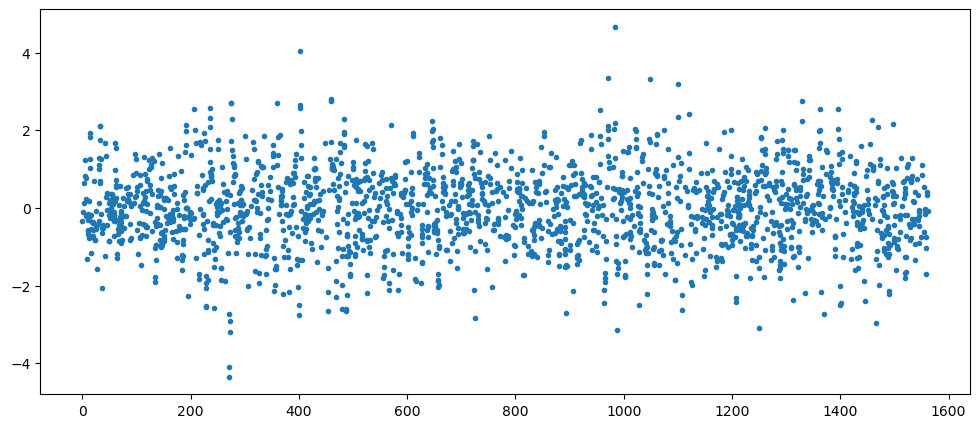

In [19]:
X_data = torch.from_numpy(X).unsqueeze(1)
y_data = torch.from_numpy(y).unsqueeze(1) 
y_data -= torch.mean(y_data)
y_std = torch.std(y_data)
if y_std > 0:     # guard against division by zero
    y_data = y_data / y_std

idx = torch.randperm(y_data.shape[0])[:2000]
# subset of the data
X_train = X_data[idx]
y_train = y_data[idx]

#all data
#X_train = X_data
#y_train = y_data


plt.figure(figsize=(12, 5))
plt.plot(X_train[:],y_train[:], '.', label='training data')
#plt.plot(X_data,y_data, label='all data')
print(f'number of datapoints: {y.shape[0]}')


In [20]:
## training preamble

kernels = ['SE', 'Laplace', 'RQ', 'LocPer']
methods = ['proj-sphere'] #projections
M_elbo = 100
M_proj = 100

times_nll = []
out_nll = []
times_vfe = []
out_vfe = []
times_proj = []
out_proj = []

#training setting
# for all 3300 points
n_steps = 2001
lr = 0.01
tol = 1e-3
optimizer = 'Adam'

In [21]:
## training routine



print('starting training ....')
for k in kernels:
    print(f'kernel = {k}')
    
    ##### Vanilla GP (NLL) #####
    print('NLL training ...')
    
    gp_nll = GP(X_train, y_train, kernel = k)
    out = gp_nll.train_step(obj = 'nll', opt_name=optimizer, lr=lr, n_steps=n_steps, tol=tol, verbose = True)
    
    times_nll.append(out["time"])     # save elapsed time
    out_nll.append(out["nll"])
    
    
    ##### SparseGP (ELBO) ##### 
    
    gp_elbo = GP(X_train, y_train, kernel = k, M=M_elbo, method = 'VFE')
    out = gp_elbo.train_step(obj = 'elbo', opt_name=optimizer, lr=lr, n_steps=n_steps, tol=tol, verbose = True)

    times_vfe.append(out["time"])     # save elapsed time
    out_vfe.append(out["nll"])
    
    for m in methods:
        print(f'projection method = {m}')
    
        ##### ProjGP ##### 
        gp_proj = GP(X_train, y_train, kernel = k, M=M_proj, method = m)
        out = gp_proj.train_step(obj = 'proj', opt_name=optimizer, lr=lr, n_steps=n_steps, tol=tol, verbose = True)        

        times_proj.append(out["time"])     # save elapsed time
        out_proj.append(out["nll"])
        
print('Training complete')        

starting training ....
kernel = SE
NLL training ...
Optimising nll using Adam
Epoch 0: loss = 2541.9978
Epoch 200: loss = 2219.5765
Epoch 400: loss = 2206.8013
Early stop at iteration 417: loss did not improve for 5 steps.
Elapsed time: 195.9[s] with NLL = 2206.78
[init_Z_kmeanspp] KMeans finished in 0.192 seconds
Optimising elbo using Adam
Epoch 0: loss = 4108.4571
Epoch 200: loss = 2982.0030
Epoch 400: loss = 2881.0229
Epoch 600: loss = 2856.9023
Epoch 800: loss = 2849.2525
Epoch 1000: loss = 2846.1478
Epoch 1200: loss = 2844.8861
Epoch 1400: loss = 2844.2908
Epoch 1600: loss = 2843.9815
Early stop at iteration 1620: loss did not improve for 5 steps.
Elapsed time: 41.1[s] with NLL = 2766.62
projection method = proj-sphere
Optimising proj using Adam
Epoch 0: loss = 139.7788
Early stop at iteration 146: loss did not improve for 5 steps.
Elapsed time: 13.8[s] with NLL = 2331.23
kernel = Laplace
NLL training ...
Optimising nll using Adam
Epoch 0: loss = 2643.3321
Epoch 200: loss = 2251.7

In [22]:
r_nll = np.array([a for a in out_nll])  # shape (4,)
r_elbo = np.array([a for a in out_vfe])  # shape (4,)
r_proj = np.array([a for a in out_proj])  # shape (4,)

print(r_nll)
print(r_elbo)
print(r_proj) 

[2206.78121088 2138.46725995 2189.94440443 2139.72723492]
[2766.62388655 2841.93659869 2837.65725511 2838.27312621]
[2331.23484873 2401.00694618 2342.29095834 3353.64642275]


In [23]:
print(make_table_combined(kernels, r_nll, r_elbo, r_proj,  times_nll, times_vfe, times_proj, "2000 EEG: Performance and running time", "tab:eeg"))


\begin{table}[ht]
\centering
\scriptsize
\begin{tabular}{lcccccc}
\toprule
Kernel & \multicolumn{2}{c}{ML} & \multicolumn{2}{c}{ELBO} & \multicolumn{2}{c}{PL} \\
\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7}
 & NLL & Time & NLL & Time & NLL & Time \\
\midrule
SE & 2206.781 & 195.94 & 2766.624 & 41.09 & 2331.235 & 13.82 \\
Laplace & 2138.467 & 874.78 & 2841.937 & 40.66 & 2401.007 & 13.64 \\
RQ & 2189.944 & 447.42 & 2837.657 & 54.70 & 2342.291 & 23.52 \\
LocPer & 2139.727 & 404.58 & 2838.273 & 68.25 & 3353.646 & 55.81 \\
\bottomrule
\end{tabular}
\caption{2000 EEG: Performance and running time}
\label{tab:eeg}
\end{table}



In [25]:
X_train.shape


torch.Size([2000, 1])

#### 